In [4]:
import numpy as np
import scipy.constants as phy_const
import matplotlib.pyplot as plt
import pickle
import math
import os
import pandas as pd

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import os
import pandas as pd
import pickle
import glob
import sys
import configparser


In [5]:
dirname = os.getcwd()
datapath1 = dirname+"/Results/alphaB_param_study_N200_no_hflux_no_coll"

## Important variables for plotting

In [6]:
axisfontsize = 18
tickfontsize = 15
legendfontsize = 15
titlefontsize = 20

## Parametric research of the best $\alpha_B$,with imposed $S_{iz}$, $K_el = 0$ and $\nu_{iw} = 0$ and no collisions at all

The aim of the script FLHET_AlphaB_param_prm_study.py is to launch several simulations with different couples of $(\alpha_{B1}, \alpha_{B2})$. From these simulations, we extract the current density at stationary regime, i.e. virtual time being $t = 20~\mu s$. $\alpha_{B1}$ is the anomalous transport coefficient in the channel  whereas $\alpha_{B2}$ is the one ine the plume.

In [7]:
alpha_B1_mesh   = np.loadtxt(datapath1+"/alphaB1_mesh.csv", delimiter='\t')
alpha_B2_mesh   = np.loadtxt(datapath1+"/alphaB2_mesh.csv", delimiter='\t')
means_j         = np.loadtxt(datapath1+"/mean_j_array.csv", delimiter='\t')

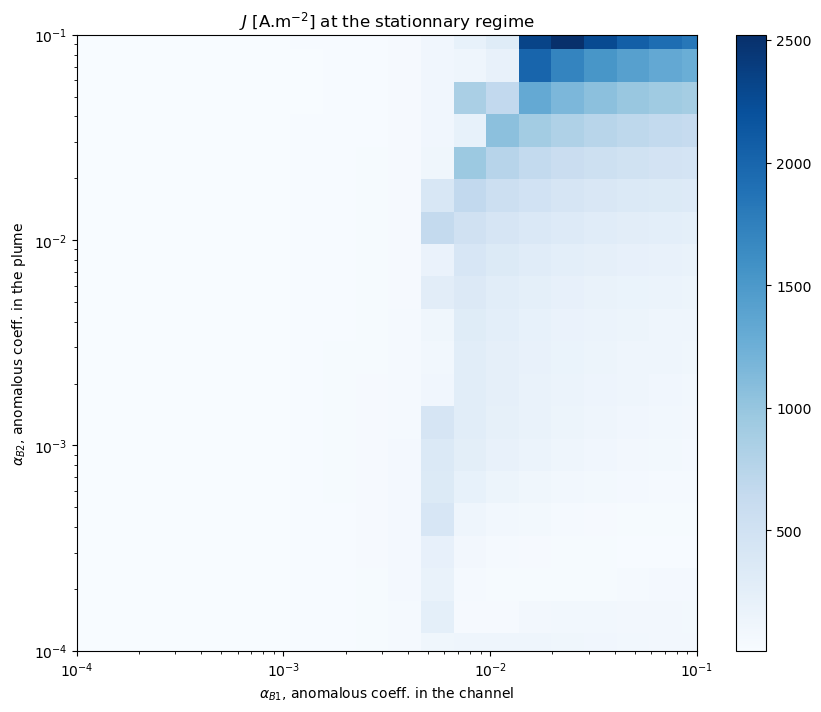

In [8]:
fig = plt.figure(figsize=(10, 8),  dpi = 100)

# vmaxcolormap0 = max(abs(means_j.min()), abs(means_j.max()))
# colornorm0 = mcolors.TwoSlopeNorm(vmin=min(-0.1,-vmaxcolormap0), vcenter=0., vmax=max(0.1,vmaxcolormap0))
# pcm0 = plt.pcolormesh(alpha_B1_mesh, alpha_B2_mesh, means_j, shading='nearest', norm=colornorm0, cmap='Blues')
pcm0 = plt.pcolormesh(alpha_B1_mesh, alpha_B2_mesh, means_j, shading='nearest', cmap='Blues')
fig.colorbar(pcm0)
plt.xscale('log')
plt.xlim([1e-4,1e-1])
plt.yscale('log')
plt.ylim([1e-4,1e-1])
plt.xlabel("$\\alpha_{B1}$, anomalous coeff. in the channel")
plt.ylabel("$\\alpha_{B2}$, anomalous coeff. in the plume")
plt.title("$J$ [A.m$^{-2}$] at the stationnary regime")
plt.show()

Filter $J_d = 690 \pm 10 \%$ A m $^{-2}$

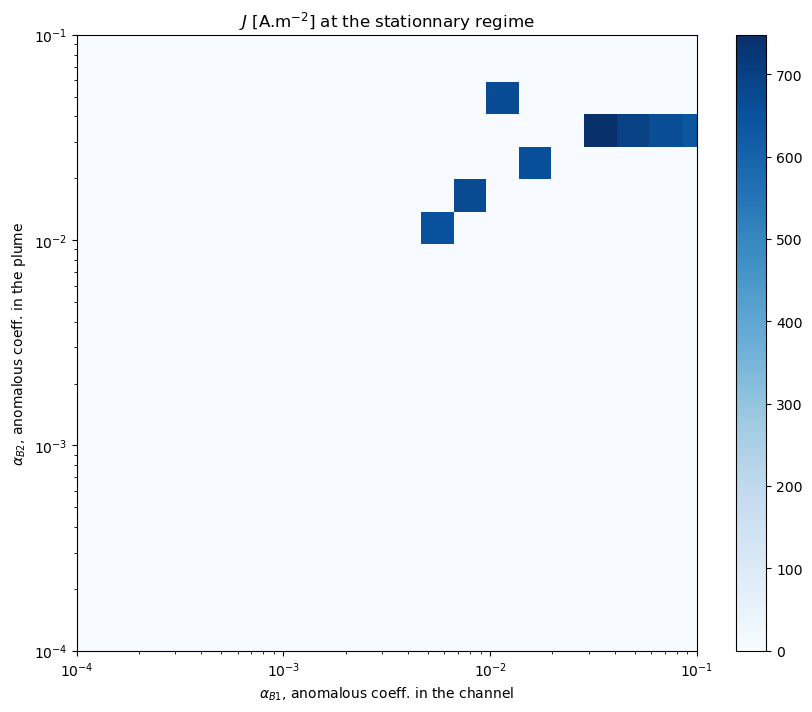

In [9]:
means_j_filtered = np.where( np.abs(means_j - 690.) <= 69. , means_j, 0.)

fig = plt.figure(figsize=(10, 8),  dpi = 100)

pcm0 = plt.pcolormesh(alpha_B1_mesh, alpha_B2_mesh, means_j_filtered, shading='nearest', cmap='Blues')
fig.colorbar(pcm0)
plt.xscale('log')
plt.xlim([1e-4,1e-1])
plt.yscale('log')
plt.ylim([1e-4,1e-1])
plt.xlabel("$\\alpha_{B1}$, anomalous coeff. in the channel")
plt.ylabel("$\\alpha_{B2}$, anomalous coeff. in the plume")
plt.title("$J$ [A.m$^{-2}$] at the stationnary regime")
plt.show()


### 1D plot

In [10]:
ias = [0,
       6,
       8,
       10,
       12,
       14,
       16,
       18
]
alpha_B1_sca  = alpha_B1_mesh[0,ias]
print(alpha_B1_sca)

[0.0001     0.00088587 0.00183298 0.00379269 0.0078476  0.01623777
 0.03359818 0.06951928]


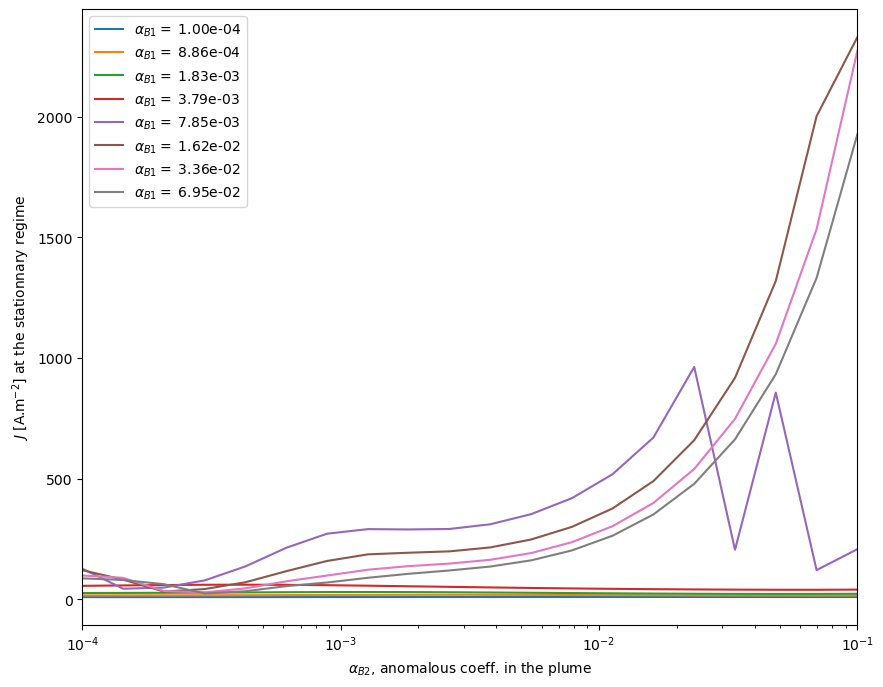

In [11]:
ncurves = len(ias)
fig = plt.figure(figsize=(10, 8),  dpi = 100)

for i in range(ncurves):
    alpha_B2_1D = alpha_B2_mesh[:,ias[i]]
    means_j_1D = means_j[:,ias[i]]
    templabel = "$\\alpha_{B1} =~$" + f"{alpha_B1_mesh[0,ias[i]]:.2e}"
    plt.plot(alpha_B2_1D, means_j_1D, label=templabel)
    
plt.xscale('log')
plt.xlim([1e-4,0.1])
plt.ylabel("$J$ [A.m$^{-2}$] at the stationnary regime")
plt.xlabel("$\\alpha_{B2}$, anomalous coeff. in the plume")
plt.legend()
plt.show()

## Looking at the value from Thomas Charoy PIC simulation

For $B = 100$ G, the study in 4th chapter of Thomas has found that the final current density would be $J_{tot} = 690$ A.m $^{-2}$. That's why from the results of the previous parametric study I look for $(\alpha_{B1}, \alpha_{B2})$ couples that achieve this current density.

### 1D Plot

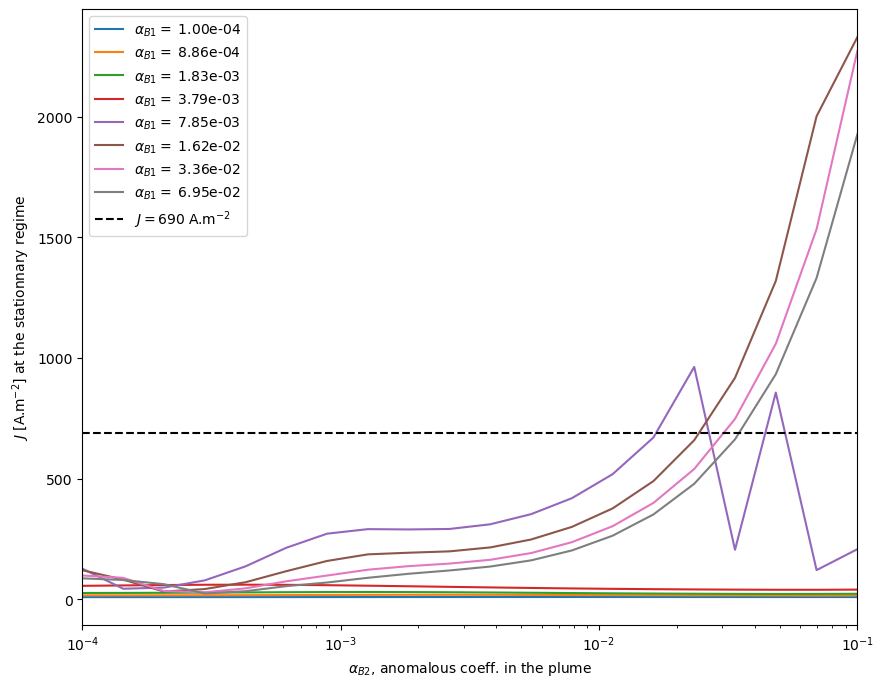

In [12]:
ncurves = len(ias)
fig = plt.figure(figsize=(10, 8),  dpi = 100)

for i in range(ncurves):
    alpha_B2_1D = alpha_B2_mesh[:,ias[i]]
    means_j_1D = means_j[:,ias[i]]
    templabel = "$\\alpha_{B1} =~$" + f"{alpha_B1_mesh[0,ias[i]]:.2e}"
    plt.plot(alpha_B2_1D, means_j_1D, label=templabel)

plt.plot([alpha_B2_1D[0],alpha_B2_1D[-1]], [690,690], 'k--', label='$J = 690$ A.m$^{-2}$')
plt.xscale('log')
plt.xlim([1e-4,0.1])
plt.ylabel("$J$ [A.m$^{-2}$] at the stationnary regime")
plt.xlabel("$\\alpha_{B2}$, anomalous coeff. in the plume")
plt.legend()
plt.show()

If we fix the $\alpha_{B1} = 3.79 \times 10^{-3}$, the $\alpha_{B2}$ that achieves best the desired current density is 

In [13]:
iaB1 = 10
print("alpha_{B1} =", f"{alpha_B1_mesh[0,iaB1]:.4e}")
means_j_1D = means_j[:,iaB1]
alpha_B2_1D = alpha_B2_mesh[:, iaB1]

n = means_j_1D.shape[0]
list_x_zeros = []
list_y_zeros = []
previous_bool = (means_j_1D[0] >= 690.)
for i in range(1, n):
    current_bool = (means_j_1D[i] >= 690.)
    xor = (current_bool & (not previous_bool))|((not current_bool) & previous_bool)
    if xor:
        x0 = alpha_B2_1D[i-1]
        x1 = alpha_B2_1D[i]
        y0 = means_j_1D[i-1]
        y1 = means_j_1D[i]
        x = x0 + (x1 - x0)*(690 - y0)/(y1 - y0) # linear interpolation achieving J = 690 A.m^{-2}

        list_x_zeros.append( x )

    previous_bool = current_bool

print("list of alpha_{B2}", list_x_zeros)
print("list of J_{tot}", list_y_zeros)

    

alpha_{B1} = 3.7927e-03
list of alpha_{B2} []
list of J_{tot} []


It seems that one of the $\alpha_{B2}$ achieving the best value of current density is $\alpha_{B2} = 9.6608 \times 10^{-3}$

In conclusion, I can take $(\alpha_{B1}, \alpha_{B2}) = (3.7927 \times 10^{-3}, 9.6608 \times 10^{-3})$.

Iteration on the $\alpha_{B1}$ and search of the best $\alpha_{B2}$, achieving the target $J_d$.

In [14]:
nalphaB1 = means_j.shape[1]

J_d_target = 690.

array_of_lists = np.empty(nalphaB1, dtype=list)

list_aB1_dots = []
list_aB2_dots = []

for k in range(nalphaB1):
    means_j_1D = means_j[:,k]
    alpha_B2_1D = alpha_B2_mesh[:, k]

    n = means_j_1D.shape[0]

    previous_bool = (means_j_1D[0] >= J_d_target)
    for i in range(1, n):
        current_bool = (means_j_1D[i] >= J_d_target)
        xor = (current_bool & (not previous_bool))|((not current_bool) & previous_bool)
        if xor:
            x0 = alpha_B2_1D[i-1]
            x1 = alpha_B2_1D[i]
            y0 = means_j_1D[i-1]
            y1 = means_j_1D[i]
            x = x0 + (x1 - x0)*(J_d_target - y0)/(y1 - y0) # linear interpolation achieving J = 690 A.m^{-2}

            list_aB1_dots.append( alpha_B1_mesh[0, k] )
            list_aB2_dots.append( x )
        previous_bool = current_bool
print("Iteration on the alpha_B1. Coords (alpha_B1, alpha_B2) achieving J_d = 690 A/m2")
print("alpha_B1", len(list_aB1_dots), list_aB1_dots)
print("alpha_B2", len(list_aB2_dots), list_aB2_dots)

array_aB1_dots = np.array(list_aB1_dots, dtype=float)
array_aB2_dots = np.array(list_aB2_dots, dtype=float)
mega_df = pd.DataFrame({'alpha_B1':array_aB1_dots, 'alpha_B2':array_aB2_dots, 'target_J_d':np.full(array_aB1_dots.shape[0], J_d_target)})


Iteration on the alpha_B1. Coords (alpha_B1, alpha_B2) achieving J_d = 690 A/m2
alpha_B1 12 [0.007847599703514606, 0.007847599703514606, 0.007847599703514606, 0.007847599703514606, 0.011288378916846883, 0.011288378916846883, 0.01623776739188721, 0.023357214690901212, 0.03359818286283781, 0.04832930238571752, 0.06951927961775606, 0.1]
alpha_B2 12 [0.01670276187734331, 0.027052985532362284, 0.04455273471425973, 0.05313882255354222, 0.02080808269256345, 0.04747738708600076, 0.024560290366105415, 0.02786084597835813, 0.03073973782350072, 0.03314098935672202, 0.03505685969995508, 0.03658468160981062]


The same operation but the transposition process. Iteration on the $\alpha_{B2}$ and search of the best $\alpha_{B1}$, achieving the target $J_d$.

In [15]:
nalphaB2 = means_j.shape[0]

list_aB1_dots = []
list_aB2_dots = []

for k in range(nalphaB2):
    means_j_1D = means_j[k,:]
    alpha_B1_1D = alpha_B1_mesh[k,:]

    n = means_j_1D.shape[0]

    previous_bool = (means_j_1D[0] >= J_d_target)
    for i in range(1, n):
        current_bool = (means_j_1D[i] >= J_d_target)
        xor = (current_bool & (not previous_bool))|((not current_bool) & previous_bool)
        if xor:
            x0 = alpha_B1_1D[i-1]
            x1 = alpha_B1_1D[i]
            y0 = means_j_1D[i-1]
            y1 = means_j_1D[i]
            x = x0 + (x1 - x0)*(J_d_target - y0)/(y1 - y0) # linear interpolation achieving J = 690 A.m^{-2}

            list_aB2_dots.append( alpha_B2_mesh[k, 0] )
            list_aB1_dots.append( x )
        previous_bool = current_bool
print("Iteration on the alpha_B2. Coords (alpha_B1, alpha_B2) achieving J_d = 690 A/m2")
print("alpha_B1", len(list_aB1_dots), list_aB1_dots)
print("alpha_B2", len(list_aB2_dots), list_aB2_dots)

array_aB1_dots = np.array(list_aB1_dots, dtype=float)
array_aB2_dots = np.array(list_aB2_dots, dtype=float)
df_temp = pd.DataFrame({'alpha_B1':array_aB1_dots, 'alpha_B2':array_aB2_dots, 'target_J_d':np.full(array_aB1_dots.shape[0], J_d_target)})
mega_df = pd.concat([mega_df, df_temp], axis=0, ignore_index=True)
print(mega_df)
    

Iteration on the alpha_B2. Coords (alpha_B1, alpha_B2) achieving J_d = 690 A/m2
alpha_B1 9 [0.007081340587166541, 0.014741117268309852, 0.00979524801931701, 0.05351281065113158, 0.007317544808063278, 0.01087513559899652, 0.011461247528972963, 0.012633434956881158, 0.012230237650836587]
alpha_B2 9 [0.023357214690901212, 0.023357214690901212, 0.03359818286283781, 0.03359818286283781, 0.04832930238571752, 0.04832930238571752, 0.04832930238571752, 0.06951927961775606, 0.1]
    alpha_B1  alpha_B2  target_J_d
0   0.007848  0.016703       690.0
1   0.007848  0.027053       690.0
2   0.007848  0.044553       690.0
3   0.007848  0.053139       690.0
4   0.011288  0.020808       690.0
5   0.011288  0.047477       690.0
6   0.016238  0.024560       690.0
7   0.023357  0.027861       690.0
8   0.033598  0.030740       690.0
9   0.048329  0.033141       690.0
10  0.069519  0.035057       690.0
11  0.100000  0.036585       690.0
12  0.007081  0.023357       690.0
13  0.014741  0.023357       690.0
1

Advanced 2D plot with the previous calcultaions of coords achieveing the right current density

Text(0, 0.5, '$\\alpha_{B2}$, anomalous coeff. in the plume')

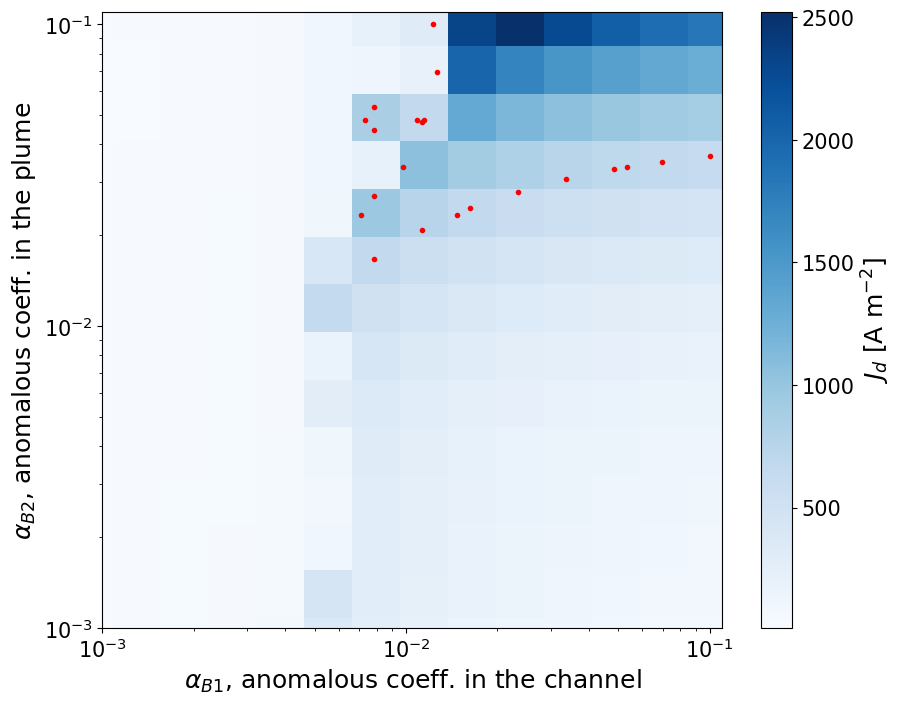

In [16]:
fig = plt.figure(figsize=(10, 8),  dpi = 100)

pcm0 = plt.pcolormesh(alpha_B1_mesh, alpha_B2_mesh, means_j, shading='nearest', cmap='Blues')
cb = plt.colorbar(pcm0)
cb.set_label(label='$J_d$ [A m$^{-2}$]', size=axisfontsize)
cb.ax.tick_params(labelsize=tickfontsize)
plt.scatter(mega_df['alpha_B1'], mega_df['alpha_B2'], marker='.', color='r')
plt.xscale('log')
plt.xlim([1e-3,0.11])
plt.yscale('log')
plt.ylim([1e-3,0.11])
plt.xticks(fontsize=tickfontsize)
plt.yticks(fontsize=tickfontsize)
plt.xlabel("$\\alpha_{B1}$, anomalous coeff. in the channel", fontsize=axisfontsize)
plt.ylabel("$\\alpha_{B2}$, anomalous coeff. in the plume", fontsize=axisfontsize)

mega_df     alpha_B1  alpha_B2  target_J_d
0   0.007848  0.016703       690.0
1   0.007848  0.027053       690.0
2   0.007848  0.044553       690.0
3   0.007848  0.053139       690.0
4   0.011288  0.020808       690.0
5   0.011288  0.047477       690.0
6   0.016238  0.024560       690.0
7   0.023357  0.027861       690.0
8   0.033598  0.030740       690.0
9   0.048329  0.033141       690.0
10  0.069519  0.035057       690.0
11  0.100000  0.036585       690.0
12  0.007081  0.023357       690.0
13  0.014741  0.023357       690.0
14  0.009795  0.033598       690.0
15  0.053513  0.033598       690.0
16  0.007318  0.048329       690.0
17  0.010875  0.048329       690.0
18  0.011461  0.048329       690.0
19  0.012633  0.069519       690.0
20  0.012230  0.100000       690.0
sorted meg_df     alpha_B1  alpha_B2  target_J_d
12  0.007081  0.023357       690.0
16  0.007318  0.048329       690.0
0   0.007848  0.016703       690.0
1   0.007848  0.027053       690.0
2   0.007848  0.044553       690.

Text(0, 0.5, '$\\alpha_{B2}$, anomalous coeff. in the plume')

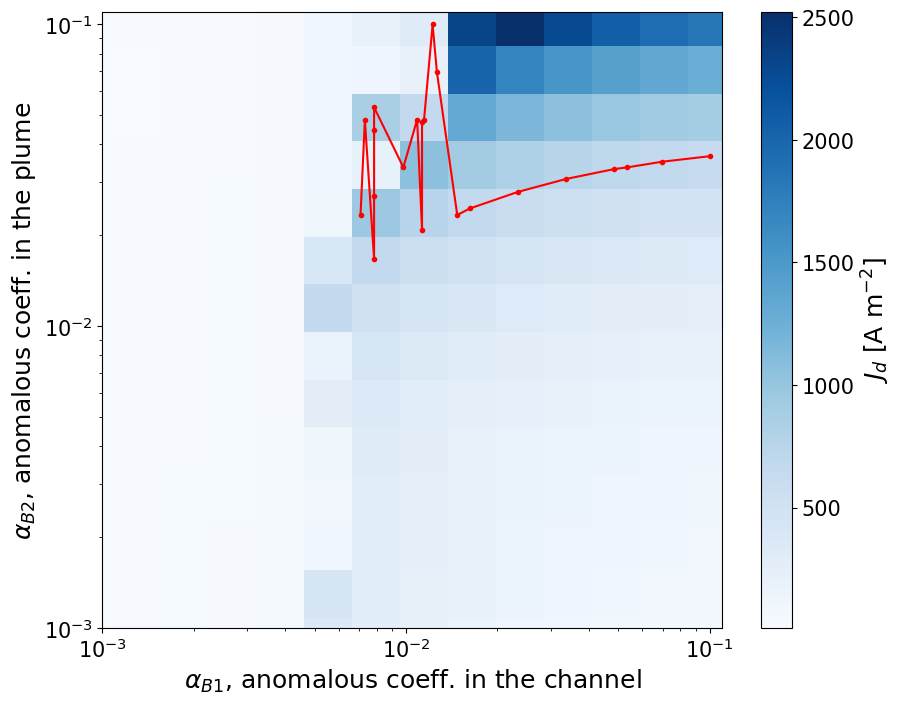

In [25]:
fig = plt.figure(figsize=(10, 8),  dpi = 100)

print("mega_df", mega_df)

sorted_df = mega_df.sort_values(['alpha_B1'], axis=0)

print("sorted meg_df", sorted_df)

pcm0 = plt.pcolormesh(alpha_B1_mesh, alpha_B2_mesh, means_j, shading='nearest', cmap='Blues')
cb = plt.colorbar(pcm0)
cb.set_label(label='$J_d$ [A m$^{-2}$]', size=axisfontsize)
cb.ax.tick_params(labelsize=tickfontsize)
plt.plot(sorted_df['alpha_B1'], sorted_df['alpha_B2'], 'r.-')
plt.xscale('log')
plt.xlim([1e-3,0.11])
plt.yscale('log')
plt.ylim([1e-3,0.11])
plt.xticks(fontsize=tickfontsize)
plt.yticks(fontsize=tickfontsize)
plt.xlabel("$\\alpha_{B1}$, anomalous coeff. in the channel", fontsize=axisfontsize)
plt.ylabel("$\\alpha_{B2}$, anomalous coeff. in the plume", fontsize=axisfontsize)

sorted meg_df
     alpha_B1  alpha_B2  target_J_d
0   0.007081  0.023357       690.0
1   0.007318  0.048329       690.0
2   0.007848  0.016703       690.0
3   0.007848  0.027053       690.0
4   0.007848  0.044553       690.0
5   0.007848  0.053139       690.0
6   0.009795  0.033598       690.0
7   0.010875  0.048329       690.0
8   0.011288  0.020808       690.0
9   0.011288  0.047477       690.0
10  0.011461  0.048329       690.0
11  0.012230  0.100000       690.0
12  0.012633  0.069519       690.0
13  0.014741  0.023357       690.0
14  0.016238  0.024560       690.0
15  0.023357  0.027861       690.0
16  0.033598  0.030740       690.0
17  0.048329  0.033141       690.0
18  0.053513  0.033598       690.0
19  0.069519  0.035057       690.0
20  0.100000  0.036585       690.0
reindex_fd     alpha_B1  alpha_B2  target_J_d
11  0.012230  0.100000       690.0
12  0.012633  0.069519       690.0
10  0.011461  0.048329       690.0
9   0.011288  0.047477       690.0
7   0.010875  0.048329       

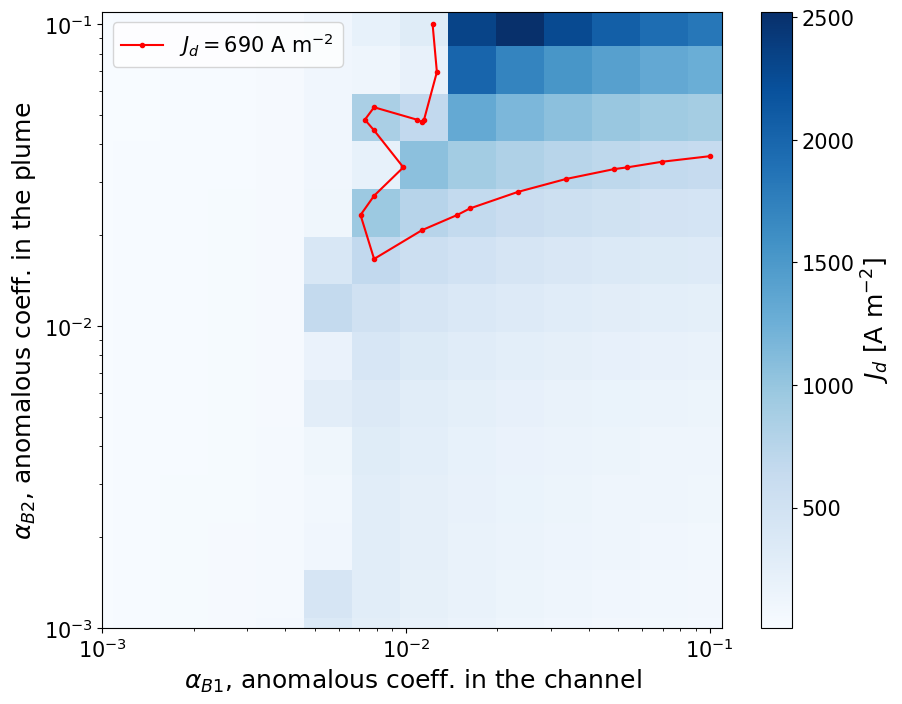

In [32]:
fig = plt.figure(figsize=(10, 8),  dpi = 108)

sorted_df.reset_index(inplace=True, drop=True)
print("sorted meg_df\n", sorted_df)

reindex_df = sorted_df.reindex([11,12,10,9,7,5,1,4,6,3,0,2,8,13,14,15,16,17,18,19,20])

print("reindex_fd", reindex_df)

pcm0 = plt.pcolormesh(alpha_B1_mesh, alpha_B2_mesh, means_j, shading='nearest', cmap='Blues')
cb = plt.colorbar(pcm0)
cb.set_label(label='$J_d$ [A m$^{-2}$]', size=axisfontsize)
cb.ax.tick_params(labelsize=tickfontsize)
plt.plot(reindex_df['alpha_B1'], reindex_df['alpha_B2'], 'r.-', label="$J_d = 690$ A m$^{-2}$")
plt.xscale('log')
plt.xlim([1e-3,0.11])
plt.yscale('log')
plt.ylim([1e-3,0.11])
plt.xticks(fontsize=tickfontsize)
plt.yticks(fontsize=tickfontsize)
plt.xlabel("$\\alpha_{B1}$, anomalous coeff. in the channel", fontsize=axisfontsize)
plt.ylabel("$\\alpha_{B2}$, anomalous coeff. in the plume", fontsize=axisfontsize)
plt.legend(loc="upper left", fontsize=legendfontsize)

Register these coords of $(\alpha_{B1}, \alpha_{B2})$ in a .csv

In [18]:
mega_df.to_csv(datapath1+'/anomalous_coords_achieving_J_d.csv', sep='\t', decimal='.', float_format='%.6f')

# Summary

| Ionization        | Elastic collisions            | Wall recombination    | (One of the) Best $(\alpha_{B1}, \alpha_{B2})$    |
| ----------        | ------------------            | ------------------    | ---------------------------------                 |
|                   |                               |                       |                                                   |
|                   |                               |                       |                                                   |      